<a href="https://colab.research.google.com/github/slxuphys/physics-demo/blob/main/billard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Demos for Youth in Physics Summer Program

## Code Preparation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import random

## Pool Table

### functions & class

In [2]:
class Ball(object):
    '''a ball
    '''
    def __init__(self,r,v,m,radius,color): #initialize the object, including the radius
        self.r=np.array(r)
        self.v=np.array(v)
        self.m=m
        self.radius = radius
        self.path={'x':[r [0]],'y':[r[1]]} #self.path is a dictionry, containing two keys 'x', 'y', the value of each key is a list
        self.graph=plt.Circle((self.path['x'][0], self.path['y'][0]),radius=self.radius,zorder=2, color=color)
        self.line=None
        self.color=color
        #r,v,m,path are attributes of ball
    def record(self):
        self.path['x'].append(self.r[0]) #append the current x position to path
        self.path['y'].append(self.r[1]) #append the current y position to path
    def draw(self,ax):
        ax.add_patch(self.graph)
        line = ax.plot(self.path['x'],self.path['y'], color=self.color)
        self.line = line[0]
    def update_position(self,indx):
        self.graph.center=self.path['x'][indx], self.path['y'][indx]
        self.line.set_data(self.path['x'][indx-500:indx],self.path['y'][indx-500:indx])
    def undraw(self):
        self.graph.remove()


def trajectory(frame_indx,ball,factor):
    indx = factor*frame_indx
    for i_ball in range(len(ball)):
        ball[i_ball].update_position(indx)

In [29]:
def motion_billiard(dt, num_step, ball, length, width, t=0):
    def boundary(ball):
        '''checking if the ball is within the boundary
        '''
        if ball.r[0]-ball.radius<0 or ball.r[0] + ball.radius>length:
            ball.v[0]=-ball.v[0]
        if ball.r[1]-ball.radius<0 or ball.r[1] + ball.radius>width:
            ball.v[1]=-ball.v[1]
        return ball
    time_list=[t]
    num_ball = len(ball)
    #starting iteration
    for i_step in range(num_step):
        ##update position
        t=t+dt
        time_list.append(t)
        for i_ball in range(num_ball):
            ball[i_ball].r += ball[i_ball].v*dt
            ball[i_ball] = boundary(ball[i_ball])
            ball[i_ball].record()
    #Visualization
    fig, ax = plt.subplots(figsize=(4,4*width/length))
    fig.set_facecolor('grey')
    ax.plot([0,0],[0,width],'w')
    ax.plot([length,length],[0,width],'w')
    ax.plot([0,length],[0,0],'w')
    ax.plot([0,length],[width,width],'w')
    ax.axis('equal')
    ax.axis('off');
    for i_ball in range(num_ball):
        ball[i_ball].draw(ax)
    plt.close()
    num_frame = int(len(ball[0].path['x'])/100) # the total number of frames
    anim = animation.FuncAnimation(fig, lambda x: trajectory(x,ball,100), frames=num_frame, interval=40)
    return anim


### run

In [30]:
ball1 = Ball(r=np.array([7.0,5.0]), v=np.array([-1,4.0]), radius=0.1, m=1.0, color='tab:blue')
ball2 = Ball(r=np.array([7.2,5.2]), v=np.array([-1,4.0]), radius=0.1, m=4.0, color='tab:red')
anim = motion_billiard(dt=0.0004, num_step=100000, ball=[ball1,ball2], length=14, width=10)
HTML(anim.to_html5_video())

In [36]:
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
anim.save('scatter.gif', writer=writer)

In [37]:
def motion_billiard_chaos(dt, num_step, ball, length, width, t=0):
    def boundary(ball):
        '''checking if the ball is within the boundary
        '''
        r1 = np.array((0, width/2))
        r2 = np.array((length, width/2))
        if ball.r[1]-ball.radius<0 or ball.r[1] + ball.radius>width:
            ball.v[1]=-ball.v[1]
        if np.linalg.norm(ball.r-r1)>width/2 and ball.r[0]<0:
            n = (ball.r - r1)
            n = n/np.linalg.norm(n)
            v_n = np.dot(ball.v,n)*n
            v_t = ball.v - v_n
            ball.v = -v_n + v_t
        if np.linalg.norm(ball.r-r2)>width/2 and ball.r[0]>length:
            n = (ball.r - r2)
            n = n/np.linalg.norm(n)
            v_n = np.dot(ball.v,n)*n
            v_t = ball.v - v_n
            ball.v = -v_n + v_t

        return ball
    time_list=[t]
    num_ball = len(ball)
    #starting iteration
    for i_step in range(num_step):

       ##update position
        t=t+dt
        time_list.append(t)
        for i_ball in range(num_ball):
            ball[i_ball].r += ball[i_ball].v*dt
            ball[i_ball] = boundary(ball[i_ball])
            ball[i_ball].record()
    #Visualization
    fig, ax = plt.subplots(figsize=(4,4*width/length))
    y = np.linspace(0,width,100)
    x = np.sqrt(width**2/4-(y-width/2)**2)
    ax.plot(-x,y,'w')
    ax.plot(x+length,y,'w')

    ax.plot([0,length],[0,0],'w')
    ax.plot([0,length],[width,width],'w')
    ax.axis('equal')
    ax.axis('off');
    fig.set_facecolor('darkgrey')
    for i_ball in range(num_ball):
        ball[i_ball].draw(ax)
    plt.close()
    num_frame = int(len(ball[0].path['x'])/100) # the total number of frames
    anim = animation.FuncAnimation(fig, lambda x: trajectory(x,ball,100), frames=num_frame, interval=40)
    return anim


In [38]:
ball1 = Ball(r=np.array([7.0,5.0]), v=np.array([-1,4.0]), radius=0.1, m=1.0, color='tab:blue')
ball2 = Ball(r=np.array([7.2,5.2]), v=np.array([-1,4.0]), radius=0.1, m=4.0, color='tab:red')
anim = motion_billiard_chaos(dt=0.0004, num_step=100000, ball=[ball1,ball2], length=14, width=10)
HTML(anim.to_html5_video())

In [39]:
writer = animation.PillowWriter(fps=15,
                                metadata=dict(artist='Me'),
                                bitrate=1800)
anim.save('chaos.gif', writer=writer)

## Newton's Gravitional Force

In [ ]:
ball1 = Ball(r=np.array([1.0,0]), v=np.array([0.0,0.0]), m=1000.0, radius=0.1)
ball2 = Ball(r=np.array([-1.0,0]), v=np.array([0,-0.5]),m=1.0, radius=0.1)
anim= central_force_N_body(dt=0.001, num_step=20000, f=lambda r: -1/r**2, ball=[ball1, ball2])
HTML(anim.to_html5_video())

In [ ]:
ball1 = Ball(r=np.array([0.9700436,-0.24308753]),v=np.array([0.466203685,0.43236573]),m=1,radius=0.1)
ball2 = Ball(r=np.array([-0.9700436,+0.24308753]),v=np.array([0.466203685,0.43236573]),m=1,radius=0.1)
ball3 = Ball(r=np.array([0.0,0.0]), v=np.array([-2*0.466203685,-2*0.43236573]),m=1,radius=0.1)
anim = central_force_N_body(0.0005, 20000, lambda r:-1/r**2, [ball1,ball2,ball3])
HTML(anim.to_html5_video())

In [ ]:
p1=0.347111
p2=0.532728
ball1 = Ball(r=np.array([0.2361300950,0.0000000000]),v=np.array([0.0000000000,1.5324315370]),m=1,radius=0.1)
ball2 = Ball(r=np.array([0.7699893804,0.0000000000]),v=np.array([0.0000000000,-0.6287350978]),m=1,radius=0.1)
ball3 = Ball(r=np.array([-1.1061194753,0.0000000000]), v=np.array([0.0000000000,-0.9036964391]),m=1,radius=0.1)
anim = central_force_N_body(0.001, 14000, lambda r:-1/r**2, [ball1,ball2,ball3])
HTML(anim.to_html5_video())

## Cellular Automata
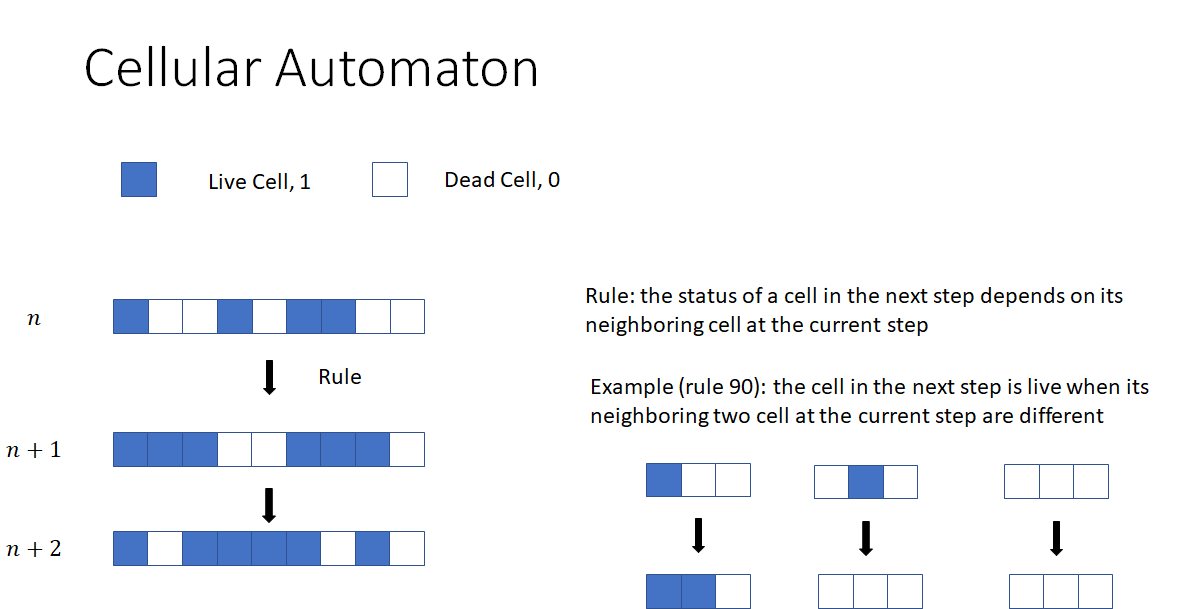


In [ ]:
def rule90(init_array, num_step):
    num_cell = len(init_array)
    m = np.zeros((num_step,num_cell)) # a zero matrix num_step*num_cell
    m[0,:]=init_array # record the inital array

    for i in range(1, num_step):
        for i_cell in range(1,num_cell-1): #go through cell_1...cell_n-1
            if m[i-1,i_cell-1] != m[i-1,i_cell+1]:
                m[i,i_cell]=0
            else:
                m[i,i_cell]=1
    return m

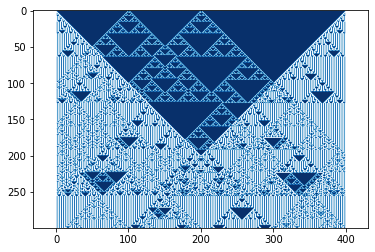

In [ ]:
init_array = np.zeros(400)
init_array[100]=1 # inital condition
init_array[200]=1
num_step =300

m = rule90(init_array, num_step) #apply the rule 100 times
plt.imshow(m, cmap='Blues')
plt.axis('equal');

## Chaos Game
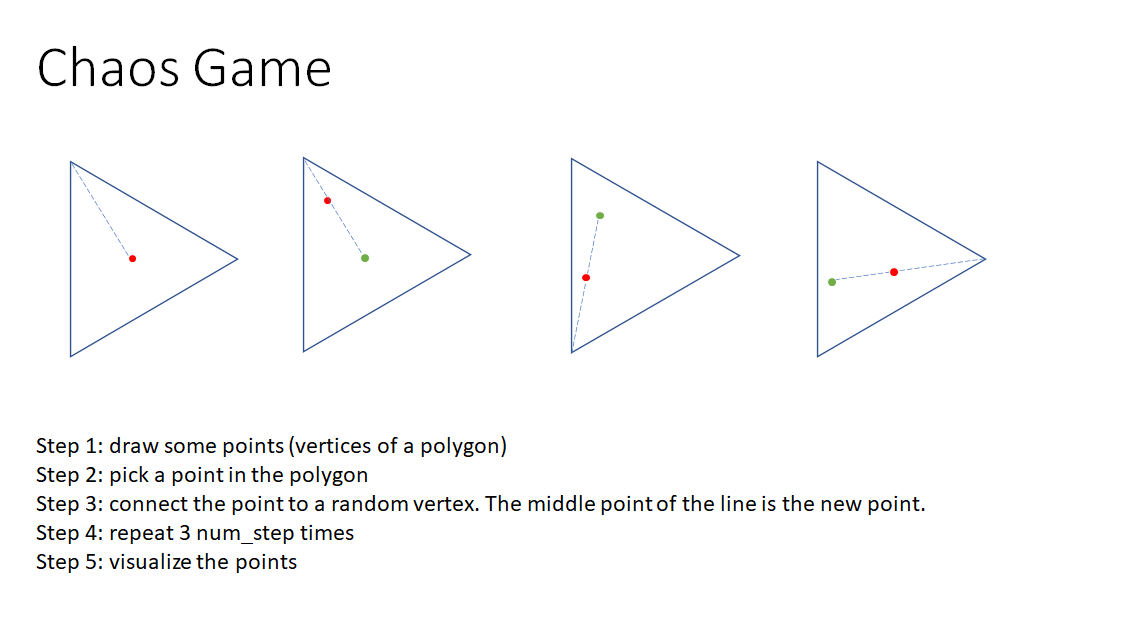

In [ ]:
def chaos_game_upgraded(n_poly,p,num_step,center=False, edge=False, rstr_rule=False):
    '''
    an upgraded version to include the option to add midpoint of the edge or centers
    and the option to apply the restriction
    '''
    def restriction(rd):
        '''
        a function determines if rd is accepted
        '''
        if rd==rd_list[-1]: #rd_list is a list record all the past selections
            return False #not accepted
        else:
            return True #accepted

    vertex=np.zeros((n_poly,2))
    angle =np.array(range(n_poly))*2*np.pi/n_poly
    vertex[:,0]=np.cos(angle)
    vertex[:,1]=np.sin(angle)

    num_vertex=n_poly

    center_point=np.zeros((1,2))

    edge_point = (vertex + np.roll(vertex,1,axis=0))/2


    if center:
        vertex=np.vstack((vertex,center_point))
        num_vertex=num_vertex+1
    if edge:
        vertex=np.vstack((vertex,edge_point))
        num_vertex=num_vertex+n_poly

    r=np.array([0.4,0])
    x_list=[0]
    y_list=[0]
    rd_list=[-1] #a list record the history of selections,contains a negative number first,so the first step does not produce an error
    for i in range(num_step):
        rd = random.randint(0,num_vertex-1)
        if rstr_rule and restriction(rd)==False:
            continue
        else:
            rd_list.append(rd)
        r = p*r + (1-p)*vertex[rd]
        x_list.append(r[0])
        y_list.append(r[1])
    return x_list, y_list

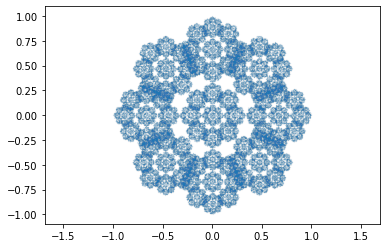

In [ ]:
x_list,y_list=chaos_game_upgraded(n_poly=8,p=1/3,num_step=200000,center=True,rstr_rule=False)
plt.plot(x_list,y_list,'.',Markersize=0.05)
plt.axis('equal');

## Game of Life

In [ ]:
dim=100
cell_bd=np.zeros((dim+2,dim+2),dtype=int)
#define neighbors
cell1=cell_bd[0:-2,1:-1]
cell2=cell_bd[2:,1:-1]
cell3=cell_bd[1:-1,0:-2]
cell4=cell_bd[1:-1,2:]
cell5=cell_bd[0:-2,0:-2]
cell6=cell_bd[2:,2:]
cell7=cell_bd[0:-2,2:]
cell8=cell_bd[2:,0:-2]

fig, ax=plt.subplots(figsize=(8,8))
ax.set_xticks(np.arange(-.5, dim, 1));
ax.set_yticks(np.arange(-.5, dim, 1));
ax.set_xlim((-0.5,dim-.5))
ax.set_ylim((-0.5,dim-.5))
ax.axes.xaxis.set_ticklabels([]);
ax.axes.yaxis.set_ticklabels([]);
ax.grid()
ax.autoscale(enable=False)
plt.close()

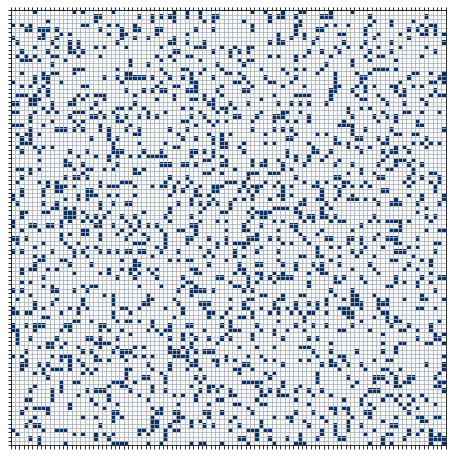

In [ ]:
cells=np.zeros(dim**2,dtype=int);
cells[:2000]=1;
np.random.shuffle(cells)
cells=np.reshape(cells,(dim,dim))
cell_bd[1:-1,1:-1]=cells
cells=cell_bd[1:-1,1:-1]
ax.matshow(cells,cmap='Blues')
ax.set_xticks(np.arange(-.5, dim, 1));
ax.set_yticks(np.arange(-.5, dim, 1));
fig

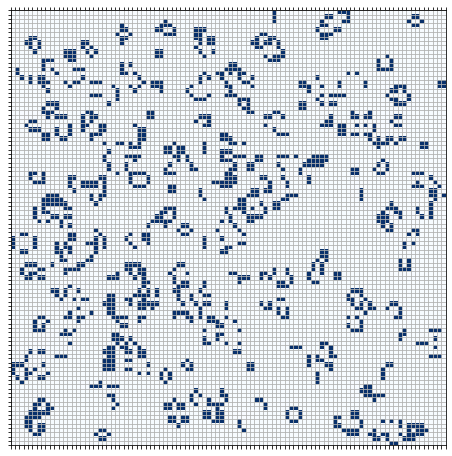

In [ ]:
num_neigh=cell1+cell2+cell3+cell4+cell5+cell6+cell7+cell8
old_cell=cells.copy()
# four rules
cells[num_neigh<2]=0
cells[num_neigh>3]=0
cells[np.logical_and(np.logical_or(num_neigh==2,num_neigh==3),old_cell==1)]=1
cells[np.logical_and(num_neigh==3, old_cell==0)]=1
# draw
last=ax.get_children()[-2]
last.remove()
ax.matshow(cells,cmap='Blues')
ax.set_xticks(np.arange(-.5, dim, 1));
ax.set_yticks(np.arange(-.5, dim, 1));
#ax.axes.xaxis.set_ticklabels([]);
#ax.axes.yaxis.set_ticklabels([]);
#ax.grid('on')
fig

## Fractal Fern

In [ ]:
def f(x,y,n):
    if n==1:
        x_new=0
        y_new=0.16*y
    if n==2:
        x_new=0.85*x+0.04*y
        y_new=-0.04*x + 0.85*y + 1.6
    if n==3:
        x_new=0.2*x - 0.26*y
        y_new=0.23*x + 0.22*y +1.6
    if n==4:
        x_new=-0.15*x + 0.28*y
        y_new=0.26*x + 0.24*y + 0.44
    return x_new, y_new

In [ ]:
x=0
y=0
x_list=[x]
y_list=[y]

for i_step in range(100000):
    rd = random.uniform(0,1)
    if rd<0.01:
        x,y=f(x,y,1)
    elif rd<0.85+0.01:
        x,y=f(x,y,2)
    elif rd<0.85+0.01+0.07:
        x,y=f(x,y,3)
    else:
        x,y=f(x,y,4)

    x_list.append(x)
    y_list.append(y)


(-2.423731672368392,
 2.8976583166146805,
 -0.49991000138511926,
 10.498110029087504)

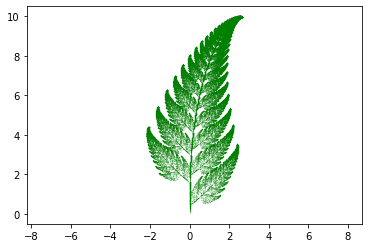

In [ ]:
plt.plot(x_list,y_list,'.g',markersize=0.1)
plt.axis('equal')